# Scikit-learn (Sklearn)

In [2]:
import sklearn

# What is it?

In [3]:
print(sklearn.__doc__)


Machine learning module for Python

sklearn is a Python module integrating classical machine
learning algorithms in the tightly-knit world of scientific Python
packages (numpy, scipy, matplotlib).

It aims to provide simple and efficient solutions to learning problems
that are accessible to everybody and reusable in various contexts:
machine-learning as a versatile tool for science and engineering.

See http://scikit-learn.org for complete documentation.



# How do you use it?

Sklearn is a bit different from most data science packages. Each machine learning model is represented as a class (user-defined type), and to apply the model one must create an instance of that class. Here's what that looks like:

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA

In [11]:
import pandas as pd
df = pd.read_csv("boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


More about this dataset if you're curious:

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html


Let's see if there's a linear relationship between crime rates and median home values

In [12]:
x = df["CRIM"].values # .values just converts the pandas df column into an np.array
y = df["MV"].values

In [13]:
model = LinearRegression() # Use the LinearRegression class to create a LinearRegression object called model

In [14]:
type(model)

sklearn.linear_model.base.LinearRegression

In [15]:
x.shape = (x.size, 1)

In [16]:
model.fit(x, y)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
model.score(x, y) # r-sqaured is:

0.15078047143448892

For more about r_sq, see here: https://en.wikipedia.org/wiki/Coefficient_of_determination

In [18]:
model.coef_

array([-0.41519028])

So for every 1 % increase in crime rate, we expect a $ 415 decrease in home value

## We could easily use other models with the same syntax:

Ridge Regression: https://en.wikipedia.org/wiki/Tikhonov_regularization

In [22]:
model = Ridge(alpha = 1)

In [23]:
model.fit(x, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [24]:
model.score(x, y)

0.15078047132648653

Lasso Regression: https://en.wikipedia.org/wiki/Lasso_(statistics)

In [15]:
model = Lasso()

In [16]:
model.fit(x, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
model.score(x, y)

0.15062004972792287

The r-squared values are similar, because each of the 3 models used above are quite similar! Try seeing correlations between different columns above? Which of the above has the highest correlation with median house prices? 

# A deeper Dive

What if we use all the predictors given to us?

In [18]:
model = LinearRegression()

In [19]:
X = df.iloc[:, :-1].values
y = df["MV"].values

In [20]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
model.score(X, y)

0.740642665185169

How well does our model perform? Well let's have a look at the data

In [22]:
predictions = model.predict(X)

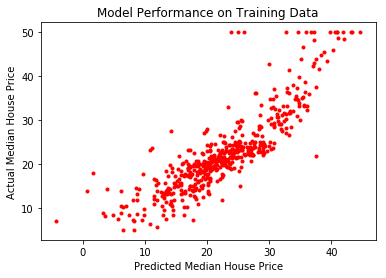

In [26]:
import matplotlib.pyplot as plt

plt.xlabel('Predicted Median House Price') 
plt.ylabel('Actual Median House Price')
plt.title('Model Performance on Training Data')


plt.plot(predictions, y, 'r.')
plt.show()

Not so bad. Note, however, that this was our performance on our training set, and that to actually know our performance, we'd like to break the data down into a training and validation set

If you'd like to learn more, try this tutorial here! It's on classifying different flowers! Using the iris dataset

https://scikit-learn.org/stable/tutorial/basic/tutorial.html